# health data

The goal here is to capture miscellaneous health data over time to gauge progress on certain goals.

#### load our data and setup the environment

In [1]:
# load in our data
from json import loads
loaded_data = []
for i in open('weight.jsl'):
    x = loads(i)
    loaded_data.append(x)
# ensure our loaded_data is sorted properly
loaded_data.sort(key=lambda x:x.get('dt'))

In [2]:
start_weight = loaded_data[0]['wt']
goal_weight = start_weight * .7# lose 30%?
days_to_achieve = 400
weight_per_day = (start_weight - goal_weight) / float(days_to_achieve)

In [3]:
%matplotlib inline
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# make the fig size bigger
sns.plt.rcParams['figure.figsize']=(15,8)

## weight glide

In the book 4 Hour Body, Tim mentions Phil Libin's approach to weight loss.  He just setup an expectation that merely being aware of his current weight on a more regular basis would allow him to lose 0.01% of his weight daily over time.  I've modeled a crude version of this below.

I wrote a simple helper to let me track my weight for a given day.

> ```wt <file> <curr weight>```

This creates an ongoing file of one json record per line that gets loaded above to load in my daily weight data.

In [4]:
start_dt = loaded_data[0]['dt']
goal_days = pd.date_range(start_dt, periods=days_to_achieve)
weight_exp = np.array([start_weight * (0.999 ** i) for i in range(days_to_achieve)])
weight_upper = weight_exp * 1.04
weight_lower = weight_exp * .96
actual = [loaded_data[0]['wt']]
actual.extend( (days_to_achieve-1)*[None] ) # nulls be cranking
g = pd.DataFrame(
    {'gw':weight_exp, 'wu':weight_upper, 'wl':weight_lower, 'date':goal_days, 'act': actual},
    index=goal_days,
    )
for ld in loaded_data:
    g.loc[ld['dt'], 'act'] = ld['wt']

,act,date,gw,wl,wu
2016-07-28,276.0,2016-07-28,276.000000,264.960000,287.040000
2016-07-29,276.0,2016-07-29,275.724000,264.695040,286.752960
2016-07-30,NaN,2016-07-30,275.448276,264.430345,286.466207
2016-07-31,NaN,2016-07-31,275.172828,264.165915,286.179741
2016-08-01,NaN,2016-08-01,274.897655,263.901749,285.893561


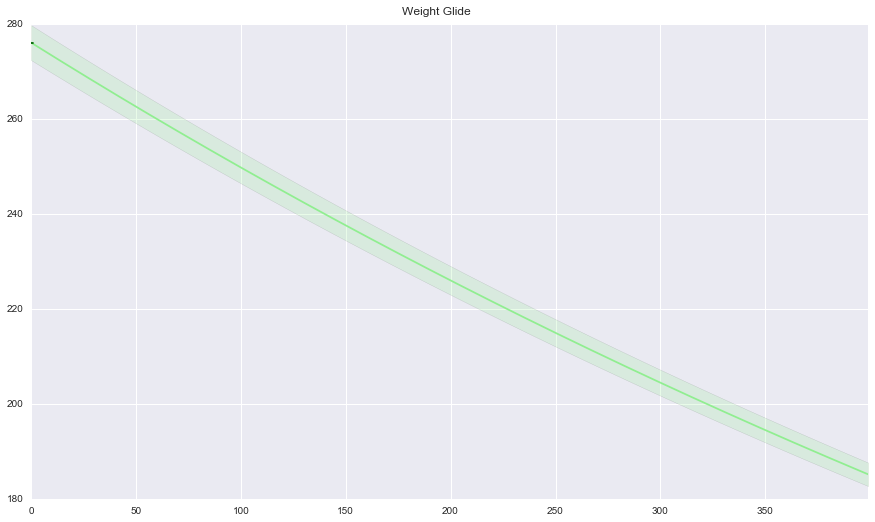

In [5]:
# get our plot
fig, ax = plt.subplots()
plt.subplots_adjust(top=0.95)
fig.suptitle('Weight Glide') # can also get the figure from plt.gcf()
# plot our expected
sns.tsplot([g.gw,  g.wl, g.wu], ax=ax, color='lightgreen')
# plot our actual
sns.tsplot([g.act], ax=ax, color='darkgreen')
fig.suptitle = 'Weight Glide'
fig.ylabel = 'Weight'

fig.xlabel = 'Days'

## Eating Rules

There are 5 rules mentioned by Tim Ferriss in 4-Hour Body that lead to weight loss and better health.

1. Avoid “white” carbohydrates (or anything that can be white).
> Basically avoid the following foods:  all bread, rice (including brown), cereal, potatoes, pasta, tortillas, and fried food with breading.
2. Eat the same few meals over and over again.
3. Don’t drink calories.
> This means cut out sodas, alcohol, fruit juices, milk (mucks with insulin), other sweets
4. Don’t eat fruit.
> Fructose jacks with your system.
5. Take one day off per week and go nuts.
> Spiking your caloric intake causes hormonal changes that improve fat-loss

The above can be found at: The 4-Hour Body (p. 75ff) by Ferriss, Timothy (2010-12-14)

He also discusses that you should eat 4 meals a day.

- breakfast
- lunch
- 2nd lunch
- dinner

And that each meal should be approximately 4 hours apart.